In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
#Read movies data
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [4]:
#Read credits data
credits = pd.read_csv('tmdb_5000_credits.csv', low_memory=False)
credits.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [5]:
#Merge data on movie_id
movies = movies.merge(credits[['movie_id','cast', 'crew']], left_on='id', right_on='movie_id', how='left')
movies.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...  ...   148.0   
3  [{"name": "Legendary Pictures", "id": 923}, {"...  ...   165.0   
4        [{"name": "Walt Disney Pictures", "id": 2}]  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count movie_id  \
0                                    Avatar          7.2      11800    19995   
1  Pirates of the Caribbean: At World's End          6.9       4500      285   
2                                   Spectre          6.3       4466   206647   
3                     The Dark Knight Rises          7.6       9106    49026   
4                               John Carter          6.1       2124    49529   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [6]:
#Remove duplicate columns
movies = movies.loc[:, ~movies.columns.duplicated()]
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
#Drop unnecessary columns
movies.drop(columns=['homepage', 'original_title','overview','tagline', 'movie_id', 'spoken_languages'], inplace=True)
movies.head()

budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

   popularity                               production_companies  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...   
1  139.082615  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  107.376788  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  112.312950  [{"name": "Legendary Pictures", "id": 923}, {"...   
4   43.926995        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime    status                                     title  vote_average  \
0    162.0  Released                                    Avatar           7.2   
1    169.0  Released  Pirates of the Caribbean: At World's End           6.9   
2    148.0  Released                                   Spectre           6.3   
3    165.0  Released                     The Dark Knight Rises           7.6   
4    132.0  Released                               John Carter           6.1   

   vote_count                                               cast  \
0       11800  [{"cast_id": 242, "character": "Jake Sully", "...   
1        4500  [{"cast_id": 4, "character": "Captain Jack Spa...   
2        4466  [{"cast_id": 1, "character": "James Bond", "cr...   
3        9106  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4        2124  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   popularity            4803 non-null   float64
 6   production_companies  4803 non-null   object 
 7   production_countries  4803 non-null   object 
 8   release_date          4802 non-null   object 
 9   revenue               4803 non-null   int64  
 10  runtime               4801 non-null   float64
 11  status                4803 non-null   object 
 12  title                 4803 non-null   object 
 13  vote_average          4803 non-null   float64
 14  vote_count            4803 non-null   int64  
 15  cast                 

In [9]:
#Extract year from release date
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce') 
movies['year'] = movies['release_date'].dt.strftime('%Y')
movies['year'] = pd.to_numeric(movies['year'], errors='coerce').astype('Int64')
movies.head()

budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

   popularity                               production_companies  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...   
1  139.082615  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  107.376788  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  112.312950  [{"name": "Legendary Pictures", "id": 923}, {"...   
4   43.926995        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime    status                                     title  vote_average  \
0    162.0  Released                                    Avatar           7.2   
1    169.0  Released  Pirates of the Caribbean: At World's End           6.9   
2    148.0  Released                                   Spectre           6.3   
3    165.0  Released                     The Dark Knight Rises           7.6   
4    132.0  Released                               John Carter           6.1   

   vote_count                                               cast  \
0       11800  [{"cast_id": 242, "character": "Jake Sully", "...   
1        4500  [{"cast_id": 4, "character": "Captain Jack Spa...   
2        4466  [{"cast_id": 1, "character": "James Bond", "cr...   
3        9106  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4        2124  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  year  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  2009  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  2007  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  2015  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  2012  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  2012

### Extract cast and crew 

In [10]:
#Extract top 2 cast members from cast column
movies['cast'] = movies['cast'].apply(lambda x: [person['name'] for person in json.loads(x)][:2] if pd.notna(x) else [])
movies.head()

budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

   popularity                               production_companies  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...   
1  139.082615  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  107.376788  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  112.312950  [{"name": "Legendary Pictures", "id": 923}, {"...   
4   43.926995        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime    status                                     title  vote_average  \
0    162.0  Released                                    Avatar           7.2   
1    169.0  Released  Pirates of the Caribbean: At World's End           6.9   
2    148.0  Released                                   Spectre           6.3   
3    165.0  Released                     The Dark Knight Rises           7.6   
4    132.0  Released                               John Carter           6.1   

   vote_count                             cast  \
0       11800   [Sam Worthington, Zoe Saldana]   
1        4500     [Johnny Depp, Orlando Bloom]   
2        4466  [Daniel Craig, Christoph Waltz]   
3        9106  [Christian Bale, Michael Caine]   
4        2124    [Taylor Kitsch, Lynn Collins]   

                                                crew  year  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  2009  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  2007  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  2015  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  2012  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  2012

In [11]:
#Parse data from json format
import ast  
def extract_names(column):
    return column.apply(lambda x: [d['name'] for d in json.loads(x)] if pd.notna(x) else [])

# Apply function to extract names
movies['genres'] = extract_names(movies['genres'])
movies['keywords'] = extract_names(movies['keywords'])
movies['production_companies'] = extract_names(movies['production_companies'])
movies['production_countries'] = extract_names(movies['production_countries'])


list_columns = ['genres','keywords', 'production_companies', 'production_countries',  'cast']
for col in list_columns:
    movies[col] = movies[col].apply(lambda x: ' | '.join(x) if x else '')
    
movies.head()

budget                                          genres      id  \
0  237000000  Action | Adventure | Fantasy | Science Fiction   19995   
1  300000000                    Adventure | Fantasy | Action     285   
2  245000000                      Action | Adventure | Crime  206647   
3  250000000               Action | Crime | Drama | Thriller   49026   
4  260000000            Action | Adventure | Science Fiction   49529   

                                            keywords original_language  \
0  culture clash | future | space war | space col...                en   
1  ocean | drug abuse | exotic island | east indi...                en   
2  spy | based on novel | secret agent | sequel |...                en   
3  dc comics | crime fighter | terrorist | secret...                en   
4  based on novel | mars | medallion | space trav...                en   

   popularity                               production_companies  \
0  150.437577  Ingenious Film Partners | Twentieth Century Fo...   
1  139.082615  Walt Disney Pictures | Jerry Bruckheimer Films...   
2  107.376788                   Columbia Pictures | Danjaq | B24   
3  112.312950  Legendary Pictures | Warner Bros. | DC Enterta...   
4   43.926995                               Walt Disney Pictures   

                        production_countries release_date     revenue  \
0  United States of America | United Kingdom   2009-12-10  2787965087   
1                   United States of America   2007-05-19   961000000   
2  United Kingdom | United States of America   2015-10-26   880674609   
3                   United States of America   2012-07-16  1084939099   
4                   United States of America   2012-03-07   284139100   

   runtime    status                                     title  vote_average  \
0    162.0  Released                                    Avatar           7.2   
1    169.0  Released  Pirates of the Caribbean: At World's End           6.9   
2    148.0  Released                                   Spectre           6.3   
3    165.0  Released                     The Dark Knight Rises           7.6   
4    132.0  Released                               John Carter           6.1   

   vote_count                            cast  \
0       11800   Sam Worthington | Zoe Saldana   
1        4500     Johnny Depp | Orlando Bloom   
2        4466  Daniel Craig | Christoph Waltz   
3        9106  Christian Bale | Michael Caine   
4        2124    Taylor Kitsch | Lynn Collins   

                                                crew  year  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  2009  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  2007  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  2015  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  2012  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  2012

In [12]:
movies['genres'] = movies['genres'].replace('', np.nan)
movies['keywords'] = movies['keywords'].replace('', np.nan)
movies['production_companies'] = movies['production_companies'].replace('', np.nan)
movies['production_countries'] = movies['production_countries'].replace('', np.nan)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4775 non-null   object        
 2   id                    4803 non-null   int64         
 3   keywords              4391 non-null   object        
 4   original_language     4803 non-null   object        
 5   popularity            4803 non-null   float64       
 6   production_companies  4452 non-null   object        
 7   production_countries  4629 non-null   object        
 8   release_date          4802 non-null   datetime64[ns]
 9   revenue               4803 non-null   int64         
 10  runtime               4801 non-null   float64       
 11  status                4803 non-null   object        
 12  title                 4803 non-null   object        
 13  vote_average      

In [13]:
#Drop records with null release date
movies = movies.dropna(subset=['release_date', 'runtime'])
movies['genres']=movies['genres'].fillna('Unknown')
movies['keywords']=movies['genres'].fillna('None')
movies['production_countries']=movies['production_countries'].fillna('Unknown')
movies['production_companies']=movies['production_companies'].fillna('Unknown')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4800 non-null   int64         
 1   genres                4800 non-null   object        
 2   id                    4800 non-null   int64         
 3   keywords              4800 non-null   object        
 4   original_language     4800 non-null   object        
 5   popularity            4800 non-null   float64       
 6   production_companies  4800 non-null   object        
 7   production_countries  4800 non-null   object        
 8   release_date          4800 non-null   datetime64[ns]
 9   revenue               4800 non-null   int64         
 10  runtime               4800 non-null   float64       
 11  status                4800 non-null   object        
 12  title                 4800 non-null   object        
 13  vote_average          4

In [14]:
#Extract Directors from crew list
def get_director(crew_list):
    try:
        crew_list = ast.literal_eval(crew_list)
        for member in crew_list:
            if member.get('job') == 'Director':
                return member.get('name')
    except (ValueError, SyntaxError):
        return None
    return None

movies['director'] = movies['crew'].apply(get_director)
movies.head()

budget                                          genres      id  \
0  237000000  Action | Adventure | Fantasy | Science Fiction   19995   
1  300000000                    Adventure | Fantasy | Action     285   
2  245000000                      Action | Adventure | Crime  206647   
3  250000000               Action | Crime | Drama | Thriller   49026   
4  260000000            Action | Adventure | Science Fiction   49529   

                                         keywords original_language  \
0  Action | Adventure | Fantasy | Science Fiction                en   
1                    Adventure | Fantasy | Action                en   
2                      Action | Adventure | Crime                en   
3               Action | Crime | Drama | Thriller                en   
4            Action | Adventure | Science Fiction                en   

   popularity                               production_companies  \
0  150.437577  Ingenious Film Partners | Twentieth Century Fo...   
1  139.082615  Walt Disney Pictures | Jerry Bruckheimer Films...   
2  107.376788                   Columbia Pictures | Danjaq | B24   
3  112.312950  Legendary Pictures | Warner Bros. | DC Enterta...   
4   43.926995                               Walt Disney Pictures   

                        production_countries release_date     revenue  \
0  United States of America | United Kingdom   2009-12-10  2787965087   
1                   United States of America   2007-05-19   961000000   
2  United Kingdom | United States of America   2015-10-26   880674609   
3                   United States of America   2012-07-16  1084939099   
4                   United States of America   2012-03-07   284139100   

   runtime    status                                     title  vote_average  \
0    162.0  Released                                    Avatar           7.2   
1    169.0  Released  Pirates of the Caribbean: At World's End           6.9   
2    148.0  Released                                   Spectre           6.3   
3    165.0  Released                     The Dark Knight Rises           7.6   
4    132.0  Released                               John Carter           6.1   

   vote_count                            cast  \
0       11800   Sam Worthington | Zoe Saldana   
1        4500     Johnny Depp | Orlando Bloom   
2        4466  Daniel Craig | Christoph Waltz   
3        9106  Christian Bale | Michael Caine   
4        2124    Taylor Kitsch | Lynn Collins   

                                                crew  year           director  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  2009      James Cameron  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  2007     Gore Verbinski  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  2015         Sam Mendes  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  2012  Christopher Nolan  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  2012     Andrew Stanton

In [15]:
#Extract Producers from crew list
def get_producer(crew_list):
    try:
        crew_list = ast.literal_eval(crew_list)
        for member in crew_list:
            if member.get('job') in ['Producer', 'Executive Producer']:
                return member.get('name')
    except (ValueError, SyntaxError):
        return None
    return None

movies['producer'] = movies['crew'].apply(get_producer)
movies.head()

budget                                          genres      id  \
0  237000000  Action | Adventure | Fantasy | Science Fiction   19995   
1  300000000                    Adventure | Fantasy | Action     285   
2  245000000                      Action | Adventure | Crime  206647   
3  250000000               Action | Crime | Drama | Thriller   49026   
4  260000000            Action | Adventure | Science Fiction   49529   

                                         keywords original_language  \
0  Action | Adventure | Fantasy | Science Fiction                en   
1                    Adventure | Fantasy | Action                en   
2                      Action | Adventure | Crime                en   
3               Action | Crime | Drama | Thriller                en   
4            Action | Adventure | Science Fiction                en   

   popularity                               production_companies  \
0  150.437577  Ingenious Film Partners | Twentieth Century Fo...   
1  139.082615  Walt Disney Pictures | Jerry Bruckheimer Films...   
2  107.376788                   Columbia Pictures | Danjaq | B24   
3  112.312950  Legendary Pictures | Warner Bros. | DC Enterta...   
4   43.926995                               Walt Disney Pictures   

                        production_countries release_date     revenue  \
0  United States of America | United Kingdom   2009-12-10  2787965087   
1                   United States of America   2007-05-19   961000000   
2  United Kingdom | United States of America   2015-10-26   880674609   
3                   United States of America   2012-07-16  1084939099   
4                   United States of America   2012-03-07   284139100   

   runtime    status                                     title  vote_average  \
0    162.0  Released                                    Avatar           7.2   
1    169.0  Released  Pirates of the Caribbean: At World's End           6.9   
2    148.0  Released                                   Spectre           6.3   
3    165.0  Released                     The Dark Knight Rises           7.6   
4    132.0  Released                               John Carter           6.1   

   vote_count                            cast  \
0       11800   Sam Worthington | Zoe Saldana   
1        4500     Johnny Depp | Orlando Bloom   
2        4466  Daniel Craig | Christoph Waltz   
3        9106  Christian Bale | Michael Caine   
4        2124    Taylor Kitsch | Lynn Collins   

                                                crew  year           director  \
0  [{"credit_id": "52fe48009251416c750aca23", "de...  2009      James Cameron   
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  2007     Gore Verbinski   
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  2015         Sam Mendes   
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  2012  Christopher Nolan   
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  2012     Andrew Stanton   

            producer  
0      James Cameron  
1  Jerry Bruckheimer  
2   Barbara Broccoli  
3      Charles Roven  
4       Colin Wilson

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4800 non-null   int64         
 1   genres                4800 non-null   object        
 2   id                    4800 non-null   int64         
 3   keywords              4800 non-null   object        
 4   original_language     4800 non-null   object        
 5   popularity            4800 non-null   float64       
 6   production_companies  4800 non-null   object        
 7   production_countries  4800 non-null   object        
 8   release_date          4800 non-null   datetime64[ns]
 9   revenue               4800 non-null   int64         
 10  runtime               4800 non-null   float64       
 11  status                4800 non-null   object        
 12  title                 4800 non-null   object        
 13  vote_average          4

In [17]:
clean_df = movies.drop(columns = ['crew', 'release_date'])

### EDA

In [18]:
#Data statistics
clean_df.describe().T

count             mean               std       min       25%  \
budget        4800.0  29060068.024792   40730294.638792       0.0  800000.0   
id            4800.0     56949.011667      88292.839372       5.0   9012.75   
popularity    4800.0        21.505569         31.822163  0.000372  4.682212   
revenue       4800.0  82312051.550833  162895004.591028       0.0       0.0   
runtime       4800.0       106.898125         22.561593       0.0      94.0   
vote_average  4800.0         6.094458          1.188366       0.0       5.6   
vote_count    4800.0       690.646875       1234.852449       0.0      54.0   
year          4800.0      2002.463542         12.414304    1916.0    1999.0   

                     50%         75%           max  
budget        15000000.0  40000000.0   380000000.0  
id               14623.5     58512.5      447027.0  
popularity     12.928897   28.350628    875.581305  
revenue       19181992.0  92938861.0  2787965087.0  
runtime            103.0       118.0         338.0  
vote_average         6.2         6.8          10.0  
vote_count         236.0      737.25       13752.0  
year              2005.0      2011.0        2017.0

In [19]:
# Select only numeric columns without the id column
numeric_cols = clean_df.select_dtypes(include='number').columns.difference(['id', 'year'])
print(numeric_cols)

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')


#### Histogram

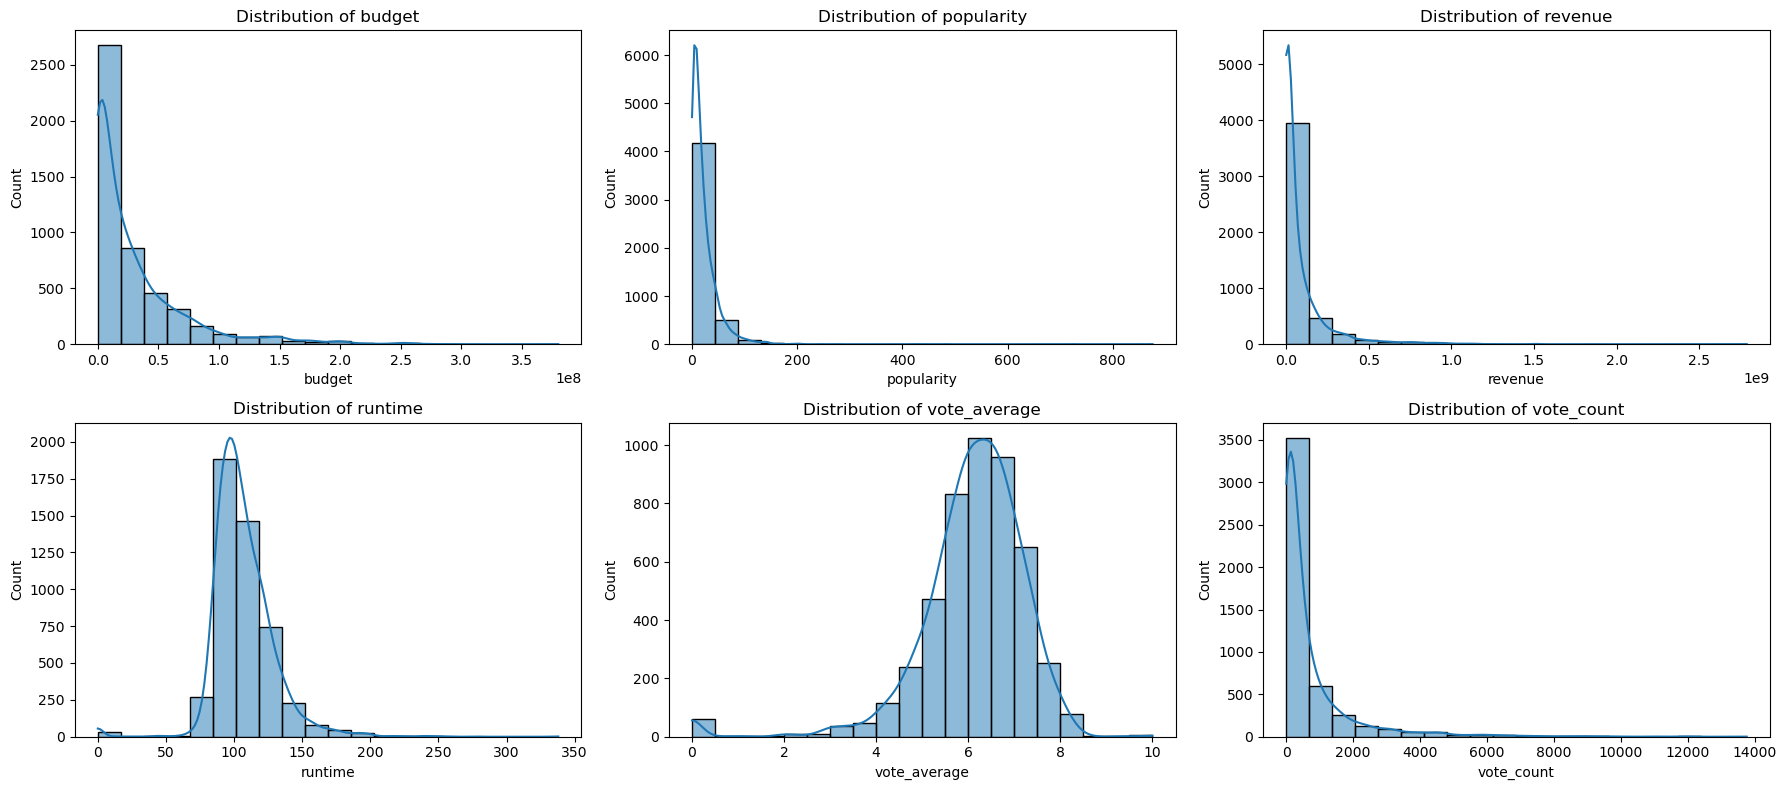

In [20]:
# number of plots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))

# Flatten the 2D axes array to 1D
axes = axes.flatten()
for i, column in enumerate(numeric_cols):
    sns.histplot(data=clean_df, x=column, kde=True,bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)

# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

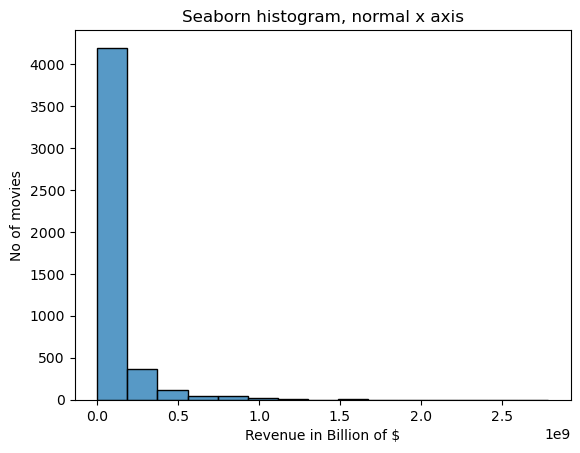

In [23]:
#Revenue in detail
sns.histplot(clean_df['revenue'], bins=15)
plt.gca().set(title='Seaborn histogram, normal x axis')
plt.xlabel('Revenue in Billion of $')
plt.ylabel('No of movies')
plt.show()

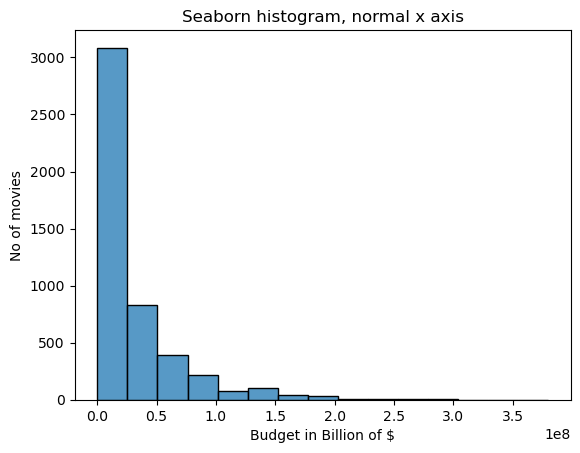

In [24]:
#Budget in detail
sns.histplot(clean_df['budget'], bins=15)
plt.gca().set(title='Seaborn histogram, normal x axis')
plt.xlabel('Budget in Billion of $')
plt.ylabel('No of movies')
plt.show()

#### Log Axis

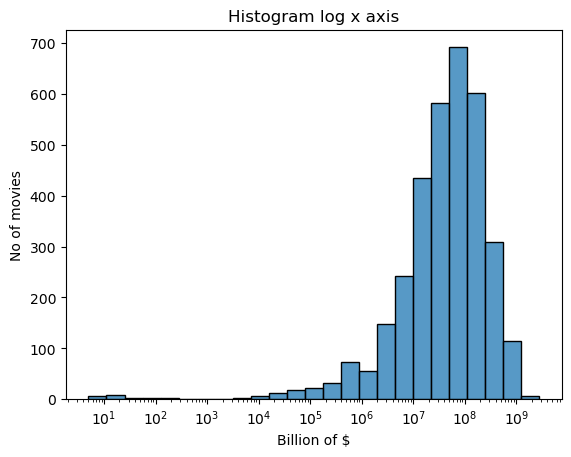

In [21]:
#Revenue in log-scale
sns.histplot(clean_df['revenue'], bins=25, log_scale=True)
plt.gca().set(title='Histogram log x axis')
plt.xlabel('Billion of $')
plt.ylabel('No of movies')
plt.show()

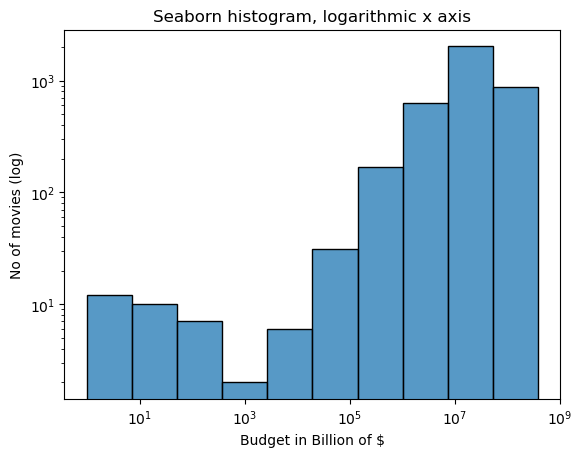

In [26]:
#Budget in log-scale
sns.histplot(clean_df['budget'], bins=10, log_scale=True)
plt.gca().set(title='Seaborn histogram, logarithmic x axis')
plt.xlabel('Budget in Billion of $')
plt.ylabel('No of movies (log)')
plt.yscale('log')
plt.show()

#### Boxplots

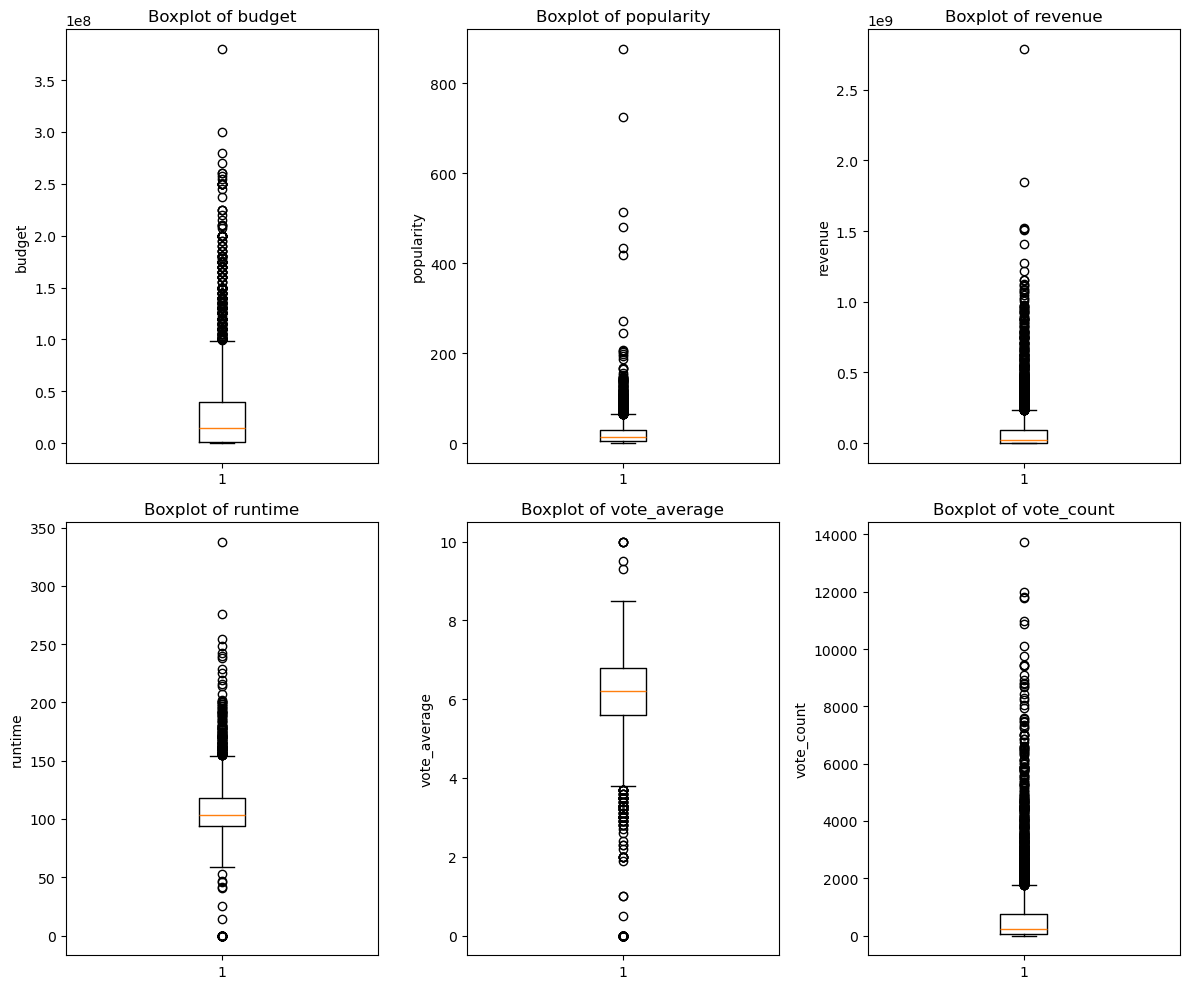

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,10))
# Flatten axes in case it's a 2D array
axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]
# Create a boxplot for each numeric column
for i, column in enumerate(numeric_cols):
    axes[i].boxplot(clean_df[column])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

### Handling outliers

In [25]:
def remove_outliers_iqr(df, columns):
    mask = pd.Series([True] * len(df), index=df.index)
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        col_mask = df[col].between(lower, upper)
        mask &= col_mask  # keep rows that are not outliers in ALL columns
    
    return df[mask]

filtered_df = remove_outliers_iqr(clean_df, numeric_cols)

In [26]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3790 entries, 83 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3790 non-null   int64  
 1   genres                3790 non-null   object 
 2   id                    3790 non-null   int64  
 3   keywords              3790 non-null   object 
 4   original_language     3790 non-null   object 
 5   popularity            3790 non-null   float64
 6   production_companies  3790 non-null   object 
 7   production_countries  3790 non-null   object 
 8   revenue               3790 non-null   int64  
 9   runtime               3790 non-null   float64
 10  status                3790 non-null   object 
 11  title                 3790 non-null   object 
 12  vote_average          3790 non-null   float64
 13  vote_count            3790 non-null   int64  
 14  cast                  3790 non-null   object 
 15  year                  379

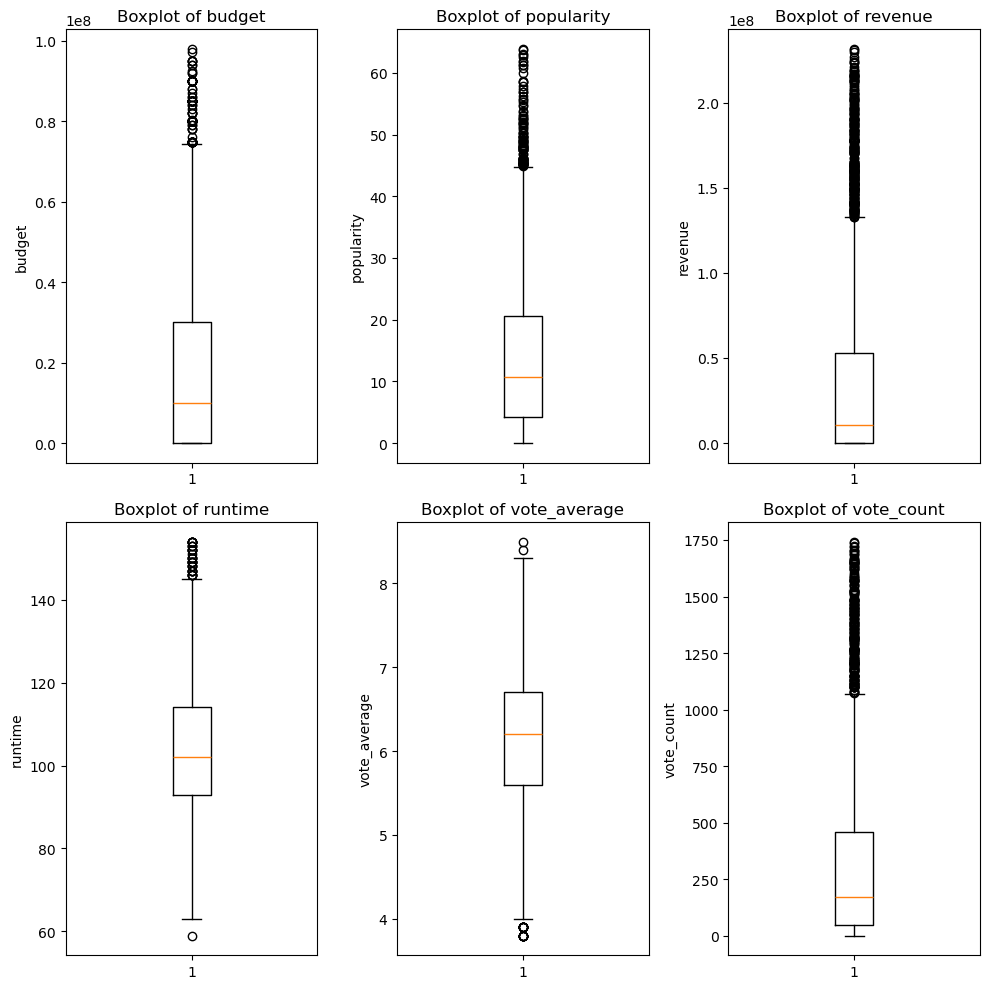

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

# Flatten axes in case it's a 2D array
axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]

# Create a boxplot for each numeric column
for i, column in enumerate(numeric_cols):
    axes[i].boxplot(filtered_df[column])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

In [33]:
filtered_df.to_csv('clean_new.csv', index=False, sep=',', encoding='utf-8')

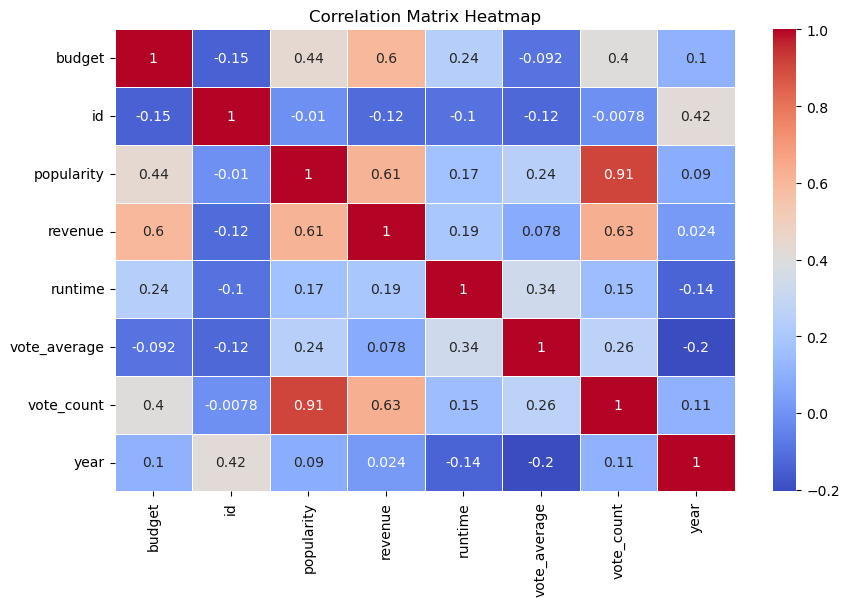

In [34]:
corr_matrix = filtered_df.corr(numeric_only = True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()